In [1]:
import numpy as np
import pandas as pd
from pandas import concat
import matplotlib.pyplot as plt
from functools import reduce
import importlib
import datetime as dt
from datetime import datetime
from math import floor
import seaborn as sns
from math import sqrt
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
import tensorflow.keras.backend as K
import tensorflow as tf
from tensorflow.keras.layers import GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras import optimizers
from tensorflow.keras import initializers
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from tensorflow.keras.layers import Reshape, Concatenate, BatchNormalization, Dropout, Add, Lambda
from tensorflow.keras.layers import add
from keras.layers import concatenate
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.activations import *
from tensorflow import keras

#sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn import metrics
from sklearn import preprocessing as prep
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import make_scorer, accuracy_score, mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE

In [2]:

date_format="%m/%d/%Y %H:%M"
date_parse = lambda date: dt.datetime.strptime(date, date_format)
# dat = pd.read_csv("C:/Users/coconnor/Documents/BM_data.csv", index_col="SettlementPeriod", parse_dates=True, date_parser=date_parse)
# dat = pd.read_csv("/home/ciaran/Documents/BM_data.csv", index_col="SettlementPeriod", parse_dates=True, date_parser=date_parse)
# dat = pd.read_csv("C:/Users/ciara/Downloads/TimerSeries1.csv", index_col="DeliveryPeriod", parse_dates=True, date_parser=date_parse)
dat = pd.read_csv("/home/ciaran/Documents/BM_data.csv", index_col="SettlementPeriod", parse_dates=True, date_parser=date_parse)

dat = dat.drop(["index"], axis=1)
dat=pd.DataFrame(dat)
dat=dat.bfill(axis ='rows')
dat=dat.ffill(axis ='rows')
dat=dat._get_numeric_data()

Y=dat.iloc[:, 0:16]
X=dat.iloc[:,16:]
X_train=X.iloc[:20050,:]
Y_train=Y.iloc[:20050,:]
X_test=X.iloc[20050:20051,:]
Y_test=Y.iloc[20050:20051,:]

rnn_train1_a=X_train[["lag_-3x1", "lag_-4x1","lag_-5x1","lag_-6x1","lag_-7x1", "lag_-8x1","lag_-9x1","lag_-10x1","lag_-11x1", "lag_-12x1","lag_-13x1","lag_-14x1","lag_-15x1", "lag_-16x1","lag_-17x1","lag_-18x1"]]
rnn_train1_b=X_train[["lag_-19x1", "lag_-20x1","lag_-21x1","lag_-22x1","lag_-23x1", "lag_-24x1","lag_-25x1","lag_-26x1","lag_-27x1", "lag_-28x1","lag_-29x1","lag_-30x1","lag_-31x1", "lag_-32x1","lag_-33x1","lag_-34x1"]]
rnn_train1_c=X_train[["lag_-35x1", "lag_-36x1","lag_-37x1","lag_-38x1","lag_-39x1", "lag_-40x1","lag_-41x1","lag_-42x1","lag_-43x1", "lag_-44x1","lag_-45x1","lag_-46x1","lag_-47x1", "lag_-48x1","lag_-49x1","lag_-50x1"]]

rnn_train2_a=X_train[["lag_-3x2", "lag_-4x2","lag_-5x2","lag_-6x2","lag_-7x2", "lag_-8x2","lag_-9x2","lag_-10x2","lag_-11x2", "lag_-12x2","lag_-13x2","lag_-14x2","lag_-15x2", "lag_-16x2","lag_-17x2","lag_-18x2"]]
rnn_train2_b=X_train[["lag_-19x2", "lag_-20x2","lag_-21x2","lag_-22x2","lag_-23x2", "lag_-24x2","lag_-25x2","lag_-26x2","lag_-27x2", "lag_-28x2","lag_-29x2","lag_-30x2","lag_-31x2", "lag_-32x2","lag_-33x2","lag_-34x2"]]
rnn_train2_c=X_train[["lag_-35x2", "lag_-36x2","lag_-37x2","lag_-38x2","lag_-39x2", "lag_-40x2","lag_-41x2","lag_-42x2","lag_-43x2", "lag_-44x2","lag_-45x2","lag_-46x2","lag_-47x2", "lag_-48x2","lag_-49x2","lag_-50x2"]]

rnn_train3_a=X_train[["lag_-2x3","lag_-3x3", "lag_-4x3","lag_-5x3","lag_-6x3","lag_-7x3", "lag_-8x3","lag_-9x3","lag_-10x3","lag_-11x3", "lag_-12x3","lag_-13x3","lag_-14x3","lag_-15x3", "lag_-16x3","lag_-17x3"]]
rnn_train3_b=X_train[["lag_-18x3","lag_-19x3", "lag_-20x3","lag_-21x3","lag_-22x3","lag_-23x3", "lag_-24x3","lag_-25x3","lag_-26x3","lag_-27x3", "lag_-28x3","lag_-29x3","lag_-30x3","lag_-31x3", "lag_-32x3","lag_-33x3"]]
rnn_train3_c=X_train[["lag_-34x3","lag_-35x3", "lag_-36x3","lag_-37x3","lag_-38x3","lag_-39x3", "lag_-40x3","lag_-41x3","lag_-42x3","lag_-43x3", "lag_-44x3","lag_-45x3","lag_-46x3","lag_-47x3", "lag_-48x3","lag_-49x3"]]

rnn_train4_a=X_train[["lag_0x6","lag_-1x6","lag_-2x6","lag_-3x6", "lag_-4x6","lag_-5x6","lag_-6x6","lag_-7x6", "lag_-8x6","lag_-9x6","lag_-10x6","lag_-11x6", "lag_-12x6","lag_-13x6","lag_-14x6","lag_-15x6"]]
rnn_train4_b=X_train[["lag_-16x6","lag_-17x6","lag_-18x6","lag_-19x6", "lag_-20x6","lag_-21x6","lag_-22x6","lag_-23x6", "lag_-24x6","lag_-25x6","lag_-26x6","lag_-27x6", "lag_-28x6","lag_-29x6","lag_-30x6","lag_-31x6"]]
rnn_train4_c=X_train[["lag_-32x6","lag_-33x6","lag_-34x6","lag_-35x6", "lag_-36x6","lag_-37x6","lag_-38x6","lag_-39x6", "lag_-40x6","lag_-41x6","lag_-42x6","lag_-43x6", "lag_-44x6","lag_-45x6","lag_-46x6","lag_-47x6"]]

rnn_train5_a=X_train[["lag_-2x12","lag_-3x12", "lag_-4x12","lag_-5x12","lag_-6x12","lag_-7x12", "lag_-8x12","lag_-9x12","lag_-10x12","lag_-11x12", "lag_-12x12","lag_-13x12","lag_-14x12","lag_-15x12", "lag_-16x12","lag_-17x12"]]
rnn_train5_b=X_train[["lag_-18x12","lag_-19x12", "lag_-20x12","lag_-21x12","lag_-22x12","lag_-23x12", "lag_-24x12","lag_-25x12","lag_-26x12","lag_-27x12", "lag_-28x12","lag_-29x12","lag_-30x12","lag_-31x12", "lag_-32x12","lag_-33x12"]]
rnn_train5_c=X_train[["lag_-34x12","lag_-35x12", "lag_-36x12","lag_-37x12","lag_-38x12","lag_-39x12", "lag_-40x12","lag_-41x12","lag_-42x12","lag_-43x12", "lag_-44x12","lag_-45x12","lag_-46x12","lag_-47x12", "lag_-48x12","lag_-49x12"]]

rnn_train6=X_train[["lag_2x7","lag_3x7","lag_4x7","lag_5x7","lag_6x7","lag_7x7","lag_8x7","lag_9x7","lag_10x7","lag_11x7","lag_12x7","lag_13x7","lag_14x7","lag_15x7","lag_16x7","lag_17x7"]]
rnn_train7=X_train[["lag_2x8","lag_3x8","lag_4x8","lag_5x8","lag_6x8","lag_7x8","lag_8x8","lag_9x8","lag_10x8","lag_11x8","lag_12x8","lag_13x8","lag_14x8","lag_15x8","lag_16x8","lag_17x8"]]
rnn_train8=X_train[["lag_2x9","lag_3x9","lag_4x9","lag_5x9","lag_6x9","lag_7x9","lag_8x9","lag_9x9","lag_10x9","lag_11x9","lag_12x9","lag_13x9","lag_14x9","lag_15x9","lag_16x9","lag_17x9"]]
rnn_train9=X_train[["lag_2x10","lag_3x10","lag_4x10","lag_5x10","lag_6x10","lag_7x10","lag_8x10","lag_9x10","lag_10x10","lag_11x10","lag_12x10","lag_13x10","lag_14x10","lag_15x10","lag_16x10","lag_17x10"]]
rnn_train10=X_train[["lag_2x11","lag_3x11","lag_4x11","lag_5x11","lag_6x11","lag_7x11","lag_8x11","lag_9x11","lag_10x11","lag_11x11","lag_12x11","lag_13x11","lag_14x11","lag_15x11","lag_16x11","lag_17x11"]]



rnn_test1_a=X_test[["lag_-3x1", "lag_-4x1","lag_-5x1","lag_-6x1","lag_-7x1", "lag_-8x1","lag_-9x1","lag_-10x1","lag_-11x1", "lag_-12x1","lag_-13x1","lag_-14x1","lag_-15x1", "lag_-16x1","lag_-17x1","lag_-18x1"]]
rnn_test1_b=X_test[["lag_-19x1", "lag_-20x1","lag_-21x1","lag_-22x1","lag_-23x1", "lag_-24x1","lag_-25x1","lag_-26x1","lag_-27x1", "lag_-28x1","lag_-29x1","lag_-30x1","lag_-31x1", "lag_-32x1","lag_-33x1","lag_-34x1"]]
rnn_test1_c=X_test[["lag_-35x1", "lag_-36x1","lag_-37x1","lag_-38x1","lag_-39x1", "lag_-40x1","lag_-41x1","lag_-42x1","lag_-43x1", "lag_-44x1","lag_-45x1","lag_-46x1","lag_-47x1", "lag_-48x1","lag_-49x1","lag_-50x1"]]

rnn_test2_a=X_test[["lag_-3x2", "lag_-4x2","lag_-5x2","lag_-6x2","lag_-7x2", "lag_-8x2","lag_-9x2","lag_-10x2","lag_-11x2", "lag_-12x2","lag_-13x2","lag_-14x2","lag_-15x2", "lag_-16x2","lag_-17x2","lag_-18x2"]]
rnn_test2_b=X_test[["lag_-19x2", "lag_-20x2","lag_-21x2","lag_-22x2","lag_-23x2", "lag_-24x2","lag_-25x2","lag_-26x2","lag_-27x2", "lag_-28x2","lag_-29x2","lag_-30x2","lag_-31x2", "lag_-32x2","lag_-33x2","lag_-34x2"]]
rnn_test2_c=X_test[["lag_-35x2", "lag_-36x2","lag_-37x2","lag_-38x2","lag_-39x2", "lag_-40x2","lag_-41x2","lag_-42x2","lag_-43x2", "lag_-44x2","lag_-45x2","lag_-46x2","lag_-47x2", "lag_-48x2","lag_-49x2","lag_-50x2"]]

rnn_test3_a=X_test[["lag_-2x3","lag_-3x3", "lag_-4x3","lag_-5x3","lag_-6x3","lag_-7x3", "lag_-8x3","lag_-9x3","lag_-10x3","lag_-11x3", "lag_-12x3","lag_-13x3","lag_-14x3","lag_-15x3", "lag_-16x3","lag_-17x3"]]
rnn_test3_b=X_test[["lag_-18x3","lag_-19x3", "lag_-20x3","lag_-21x3","lag_-22x3","lag_-23x3", "lag_-24x3","lag_-25x3","lag_-26x3","lag_-27x3", "lag_-28x3","lag_-29x3","lag_-30x3","lag_-31x3", "lag_-32x3","lag_-33x3"]]
rnn_test3_c=X_test[["lag_-34x3","lag_-35x3", "lag_-36x3","lag_-37x3","lag_-38x3","lag_-39x3", "lag_-40x3","lag_-41x3","lag_-42x3","lag_-43x3", "lag_-44x3","lag_-45x3","lag_-46x3","lag_-47x3", "lag_-48x3","lag_-49x3"]]

rnn_test4_a=X_test[["lag_0x6","lag_-1x6","lag_-2x6","lag_-3x6", "lag_-4x6","lag_-5x6","lag_-6x6","lag_-7x6", "lag_-8x6","lag_-9x6","lag_-10x6","lag_-11x6", "lag_-12x6","lag_-13x6","lag_-14x6","lag_-15x6"]]
rnn_test4_b=X_test[["lag_-16x6","lag_-17x6","lag_-18x6","lag_-19x6", "lag_-20x6","lag_-21x6","lag_-22x6","lag_-23x6", "lag_-24x6","lag_-25x6","lag_-26x6","lag_-27x6", "lag_-28x6","lag_-29x6","lag_-30x6","lag_-31x6"]]
rnn_test4_c=X_test[["lag_-32x6","lag_-33x6","lag_-34x6","lag_-35x6", "lag_-36x6","lag_-37x6","lag_-38x6","lag_-39x6", "lag_-40x6","lag_-41x6","lag_-42x6","lag_-43x6", "lag_-44x6","lag_-45x6","lag_-46x6","lag_-47x6"]]

rnn_test5_a=X_test[["lag_-2x12","lag_-3x12", "lag_-4x12","lag_-5x12","lag_-6x12","lag_-7x12", "lag_-8x12","lag_-9x12","lag_-10x12","lag_-11x12", "lag_-12x12","lag_-13x12","lag_-14x12","lag_-15x12", "lag_-16x12","lag_-17x12"]]
rnn_test5_b=X_test[["lag_-18x12","lag_-19x12", "lag_-20x12","lag_-21x12","lag_-22x12","lag_-23x12", "lag_-24x12","lag_-25x12","lag_-26x12","lag_-27x12", "lag_-28x12","lag_-29x12","lag_-30x12","lag_-31x12", "lag_-32x12","lag_-33x12"]]
rnn_test5_c=X_test[["lag_-34x12","lag_-35x12", "lag_-36x12","lag_-37x12","lag_-38x12","lag_-39x12", "lag_-40x12","lag_-41x12","lag_-42x12","lag_-43x12", "lag_-44x12","lag_-45x12","lag_-46x12","lag_-47x12", "lag_-48x12","lag_-49x12"]]

rnn_test6=X_test[["lag_2x7","lag_3x7","lag_4x7","lag_5x7","lag_6x7","lag_7x7","lag_8x7","lag_9x7","lag_10x7","lag_11x7","lag_12x7","lag_13x7","lag_14x7","lag_15x7","lag_16x7","lag_17x7"]]
rnn_test7=X_test[["lag_2x8","lag_3x8","lag_4x8","lag_5x8","lag_6x8","lag_7x8","lag_8x8","lag_9x8","lag_10x8","lag_11x8","lag_12x8","lag_13x8","lag_14x8","lag_15x8","lag_16x8","lag_17x8"]]
rnn_test8=X_test[["lag_2x9","lag_3x9","lag_4x9","lag_5x9","lag_6x9","lag_7x9","lag_8x9","lag_9x9","lag_10x9","lag_11x9","lag_12x9","lag_13x9","lag_14x9","lag_15x9","lag_16x9","lag_17x9"]]
rnn_test9=X_test[["lag_2x10","lag_3x10","lag_4x10","lag_5x10","lag_6x10","lag_7x10","lag_8x10","lag_9x10","lag_10x10","lag_11x10","lag_12x10","lag_13x10","lag_14x10","lag_15x10","lag_16x10","lag_17x10"]]
rnn_test10=X_test[["lag_2x11","lag_3x11","lag_4x11","lag_5x11","lag_6x11","lag_7x11","lag_8x11","lag_9x11","lag_10x11","lag_11x11","lag_12x11","lag_13x11","lag_14x11","lag_15x11","lag_16x11","lag_17x11"]]

rnn_Y=Y_train[["lag_2y", "lag_3y", "lag_4y", "lag_5y", "lag_6y", "lag_7y", "lag_8y", "lag_9y", "lag_10y", "lag_11y", "lag_12y", "lag_13y", "lag_14y", "lag_15y", "lag_16y", "lag_17y"]]

X_scaler1_a = preprocessing.MinMaxScaler()
X_scaler1_b = preprocessing.MinMaxScaler()
X_scaler1_c = preprocessing.MinMaxScaler()

X_scaler2_a = preprocessing.MinMaxScaler()
X_scaler2_b = preprocessing.MinMaxScaler()
X_scaler2_c = preprocessing.MinMaxScaler()

X_scaler3_a = preprocessing.MinMaxScaler()
X_scaler3_b = preprocessing.MinMaxScaler()
X_scaler3_c = preprocessing.MinMaxScaler()

X_scaler4_a = preprocessing.MinMaxScaler()
X_scaler4_b = preprocessing.MinMaxScaler()
X_scaler4_c = preprocessing.MinMaxScaler()

X_scaler5_a = preprocessing.MinMaxScaler()
X_scaler5_b = preprocessing.MinMaxScaler()
X_scaler5_c = preprocessing.MinMaxScaler()


X_scaler6 = preprocessing.MinMaxScaler()
X_scaler7 = preprocessing.MinMaxScaler()
X_scaler8 = preprocessing.MinMaxScaler()
X_scaler9 = preprocessing.MinMaxScaler()
X_scaler10 = preprocessing.MinMaxScaler()

Y_scaler = preprocessing.MinMaxScaler()

rnn_scaled_train1_a = X_scaler1_a.fit_transform(rnn_train1_a)
rnn_scaled_train1_b = X_scaler1_b.fit_transform(rnn_train1_b)
rnn_scaled_train1_c = X_scaler1_c.fit_transform(rnn_train1_c)

rnn_scaled_train2_a = X_scaler2_a.fit_transform(rnn_train2_a)
rnn_scaled_train2_b = X_scaler2_b.fit_transform(rnn_train2_b)
rnn_scaled_train2_c = X_scaler2_c.fit_transform(rnn_train2_c)

rnn_scaled_train3_a = X_scaler3_a.fit_transform(rnn_train3_a)
rnn_scaled_train3_b = X_scaler3_b.fit_transform(rnn_train3_b)
rnn_scaled_train3_c = X_scaler3_c.fit_transform(rnn_train3_c)

rnn_scaled_train4_a = X_scaler4_a.fit_transform(rnn_train4_a)
rnn_scaled_train4_b = X_scaler4_b.fit_transform(rnn_train4_b)
rnn_scaled_train4_c = X_scaler4_c.fit_transform(rnn_train4_c)

rnn_scaled_train5_a = X_scaler5_a.fit_transform(rnn_train5_a)
rnn_scaled_train5_b = X_scaler5_b.fit_transform(rnn_train5_b)
rnn_scaled_train5_c = X_scaler5_c.fit_transform(rnn_train5_c)

rnn_scaled_train6 = X_scaler6.fit_transform(rnn_train6)
rnn_scaled_train7 = X_scaler7.fit_transform(rnn_train7)
rnn_scaled_train8 = X_scaler8.fit_transform(rnn_train8)
rnn_scaled_train9 = X_scaler9.fit_transform(rnn_train9)
rnn_scaled_train10 = X_scaler10.fit_transform(rnn_train10)

Y_train_Scaled   = Y_scaler.fit_transform(Y_train)
Y_test_scaled = Y_scaler.transform(Y_test)
 
X_train_Scaled = np.hstack(
    (rnn_scaled_train1_a, rnn_scaled_train1_b, rnn_scaled_train1_c, rnn_scaled_train2_a, rnn_scaled_train2_b, rnn_scaled_train2_c,
     rnn_scaled_train3_a, rnn_scaled_train3_b, rnn_scaled_train3_c, rnn_scaled_train4_a, rnn_scaled_train4_b, rnn_scaled_train4_c,
     rnn_scaled_train5_a, rnn_scaled_train5_b, rnn_scaled_train5_c,rnn_scaled_train6,rnn_scaled_train7, rnn_scaled_train8,
     rnn_scaled_train9, rnn_scaled_train10)
).reshape(rnn_train6.shape[0], 20, 16).transpose(0, 2, 1)

X_test_Scaled = np.hstack(
    (X_scaler1_a.transform(rnn_test1_a),X_scaler1_b.transform(rnn_test1_b),X_scaler1_c.transform(rnn_test1_c),
     X_scaler2_a.transform(rnn_test2_a),X_scaler2_b.transform(rnn_test2_b),X_scaler2_c.transform(rnn_test2_c),
     X_scaler3_a.transform(rnn_test3_a),X_scaler3_b.transform(rnn_test3_b),X_scaler3_c.transform(rnn_test3_c),
     X_scaler4_a.transform(rnn_test4_a),X_scaler4_b.transform(rnn_test4_b),X_scaler4_c.transform(rnn_test4_c),
     X_scaler5_a.transform(rnn_test5_a),X_scaler5_b.transform(rnn_test5_b),X_scaler5_c.transform(rnn_test5_c),
     X_scaler6.transform(rnn_test6),X_scaler7.transform(rnn_test7),X_scaler8.transform(rnn_test8),
     X_scaler9.transform(rnn_test9), X_scaler10.transform(rnn_test10))
).reshape(rnn_test6.shape[0], 20, 16).transpose(0, 2, 1)

i_shape=(X_train_Scaled.shape[1], X_train_Scaled.shape[2])

/tmp/ipykernel_154184/1651104588.py:40: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, epochs=30, batch_size=16, verbose=2)


1/1 - 0s - 58ms/epoch - 58ms/step
28.234545764923098


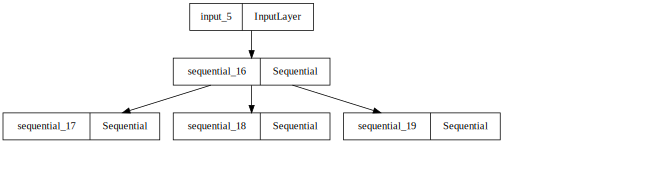

In [22]:
def qloss(qs, y_true, y_pred):
    # Pinball loss for multiple quantiles
    q = tf.constant(np.array([qs]), dtype=tf.float32)
    e = y_true - y_pred
    v = tf.maximum(q*e, (q-1)*e)
    return K.mean(v)

loss_10th_p = lambda y_true, y_pred: qloss(0.1, y_true, y_pred)
loss_50th_p = lambda y_true, y_pred: qloss(0.5, y_true, y_pred)
loss_90th_p = lambda y_true, y_pred: qloss(0.9, y_true, y_pred)

def create_model():    
    net_input=Input(shape=i_shape)    
    input_0 = Sequential([keras.layers.Flatten(input_shape=i_shape),
                          keras.layers.Dense(128, 'relu'),
                          keras.layers.Dense(128, 'relu'),
                          keras.layers.Dense(128, 'relu'),
                          keras.layers.Dense(128, 'relu'),
                          keras.layers.Dense(128, 'relu')])(net_input) 
    
    
    output_1 = keras.Sequential([
        keras.layers.Dense(128, 'relu'), 
        keras.layers.Dense(16)])(input_0)
    
    output_2 = keras.Sequential([
        keras.layers.Dense(128, 'relu'), 
        keras.layers.Dense(16)])(input_0)
    
    output_3 = keras.Sequential([
        keras.layers.Dense(128, 'relu'), 
        keras.layers.Dense(16)])(input_0)
    
    model=Model(inputs=net_input, outputs=[output_1, output_2, output_3])    
    model.compile(loss=[loss_10th_p, loss_50th_p, loss_90th_p], optimizer='adam')
    
    return model

# es = EarlyStopping(monitor='mean_absolute_error', mode='min', verbose=0, patience=20)
model = KerasRegressor(build_fn=create_model, epochs=30, batch_size=16, verbose=2)
model.fit(X_train_Scaled, Y_train_Scaled, epochs=30, verbose=0)
model_test_predictions = pd.DataFrame(Y_scaler.inverse_transform(model.predict(X_test_Scaled).reshape(3,16)))
print(mean_absolute_error(Y_test.T, model_test_predictions.iloc[1:2,:]))
SVG(model_to_dot(create_model()).create(prog='dot', format='svg'))

In [26]:
pred_10=model_test_predictions.iloc[:1,:].T
pred_50=model_test_predictions.iloc[1:2,:].T
pred_90=model_test_predictions.iloc[2:,:].T
pred_10=pred_10.reset_index(drop=True)
pred_50=pred_50.reset_index(drop=True)
pred_90=pred_90.reset_index(drop=True)
Y_test=Y_test.T
Y_test=Y_test.reset_index(drop=True)
# pred_90=np.array(pred_90)
pred_90=pred_90.values.ravel()
pred_10=pred_10.values.ravel()
pred_50=pred_50.values.ravel()
# Y_test=Y_test.values.ravel()

# pred_50.index = pred_50.index.values
# pred_10.index = pred_10.index.values
# pred_90.index = pred_90.index.values

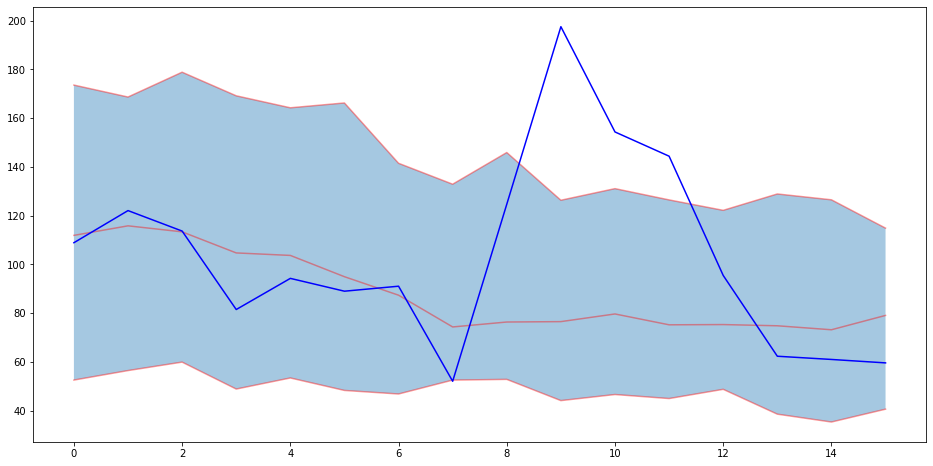

In [27]:


plt.figure(figsize=(16, 8))
# plt.scatter(X, y, alpha=0.5, color='tab:blue')
# plt.scatter(X_out, y_out, alpha=0.5, color='tab:orange')
plt.plot(pred_50, color='red', alpha=0.4)
plt.plot(pred_10, color='red', alpha=0.4)
plt.plot(pred_90, color='red', alpha=0.4)

plt.plot(Y_test, color='blue')
plt.fill_between(np.arange(0,len(Y_test),1), pred_10, pred_90, alpha=0.4)

# plt.fill_between(model_test_predictions.iloc[2:,:].T, model_test_predictions.iloc[1:2,:].T, color='red', alpha=0.4)


# plt.plot(Y_test, color='tab:red', linestyle='--')

# plt.xlabel('X')
# plt.ylabel('y');

The Glorot normal initializer, also called Xavier normal initializer.

Also available via the shortcut function tf.keras.initializers.glorot_normal.

Draws samples from a truncated normal distribution centered on 0 with stddev = sqrt(2 / (fan_in + fan_out)) where fan_in is the number of input units in the weight tensor and fan_out is the number of output units in the weight tensor.

/tmp/ipykernel_154184/2714378075.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, epochs=5, batch_size=16, verbose=2)


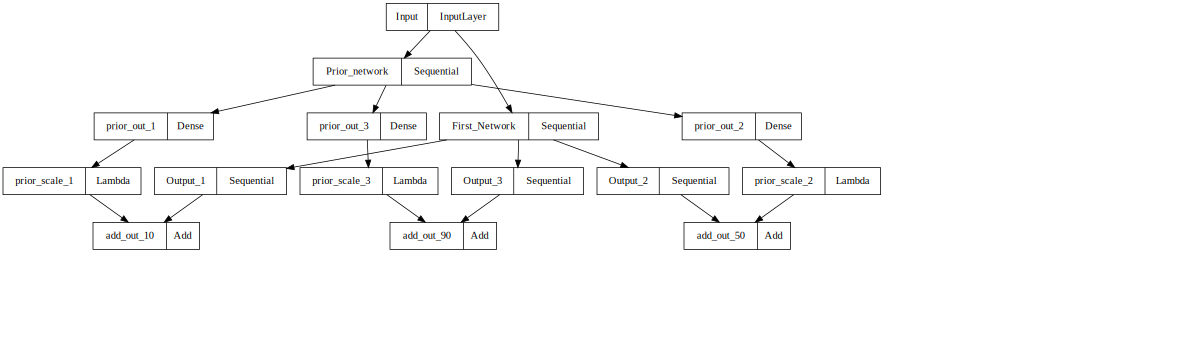

In [28]:
def create_model():    
    net_input=Input(shape=i_shape, name='Input')
    
    Seq_network = Sequential([keras.layers.Flatten(input_shape=i_shape),
                          keras.layers.Dense(128, 'relu'),
                          keras.layers.Dense(128, 'relu'),
                          keras.layers.Dense(128, 'relu'),
                          keras.layers.Dense(128, 'relu'),
                          keras.layers.Dense(128, 'relu')], name='First_Network')(net_input) 
    
    Prior_network = Sequential([keras.layers.Flatten(input_shape=i_shape),
                          keras.layers.Dense(128, 'relu', 
                                             kernel_initializer='normal', 
                                             trainable=False),
                          keras.layers.Dense(128, 'relu', 
                                             kernel_initializer='normal', 
                                             trainable=False),
                          keras.layers.Dense(128, 'relu', 
                                             kernel_initializer='normal', 
                                             trainable=False),
                          keras.layers.Dense(128, 'relu', 
                                             kernel_initializer='normal', 
                                             trainable=False),
                          keras.layers.Dense(128, 'relu', 
                                             kernel_initializer='normal', 
                                             trainable=False)], name='Prior_network')(net_input) 
    
    
    
    output_10 = keras.Sequential([
        keras.layers.Dense(128, 'relu'), 
        keras.layers.Dense(16)], name='Output_1')(Seq_network)
    
    output_50 = keras.Sequential([
        keras.layers.Dense(128, 'relu'), 
        keras.layers.Dense(16)], name='Output_2')(Seq_network)
    
    output_90 = keras.Sequential([
        keras.layers.Dense(128, 'relu'), 
        keras.layers.Dense(16)], name='Output_3')(Seq_network) 

    prior_out_10 = Dense(16, 'relu', kernel_initializer='normal',
                        trainable=False, name='prior_out_1')(Prior_network)
    prior_out_50 = Dense(16, 'relu', kernel_initializer='normal', 
                        trainable=False, name='prior_out_2')(Prior_network)
    prior_out_90 = Dense(16, 'relu', kernel_initializer='normal', 
                        trainable=False, name='prior_out_3')(Prior_network)
    
    
    
    prior_out_10 = Lambda(lambda x: x * 3.0, name='prior_scale_1')(prior_out_10)
    prior_out_50 = Lambda(lambda x: x * 3.0, name='prior_scale_2')(prior_out_50)
    prior_out_90 = Lambda(lambda x: x * 3.0, name='prior_scale_3')(prior_out_90)
    
    add_out_10 = add([output_10, prior_out_10], name='add_out_10')
    add_out_50 = add([output_50, prior_out_50], name='add_out_50')
    add_out_90 = add([output_90, prior_out_90], name='add_out_90')
    
    model=Model(inputs=net_input, outputs=[add_out_10, add_out_50 ,add_out_90])    
    model.compile(loss=[loss_10th_p, loss_50th_p, loss_90th_p], optimizer='adam')
    
    return model

# es = EarlyStopping(monitor='mean_absolute_error', mode='min', verbose=0, patience=20)
model = KerasRegressor(build_fn=create_model, epochs=5, batch_size=16, verbose=2)
SVG(model_to_dot(create_model()).create(prog='dot', format='svg'))

In [29]:
model.fit(X_train_Scaled, Y_train_Scaled, epochs=30, verbose=0)
model_test_predictions = pd.DataFrame(Y_scaler.inverse_transform(model.predict(X_test_Scaled).reshape(3,16)))

model_test_predictions
model_test_predictions.iloc[1:2,:]
Y_test.T
print(mean_absolute_error(Y_test.T, model_test_predictions.iloc[1:2,:]))

1/1 - 0s - 87ms/epoch - 87ms/step
33.44420904159546


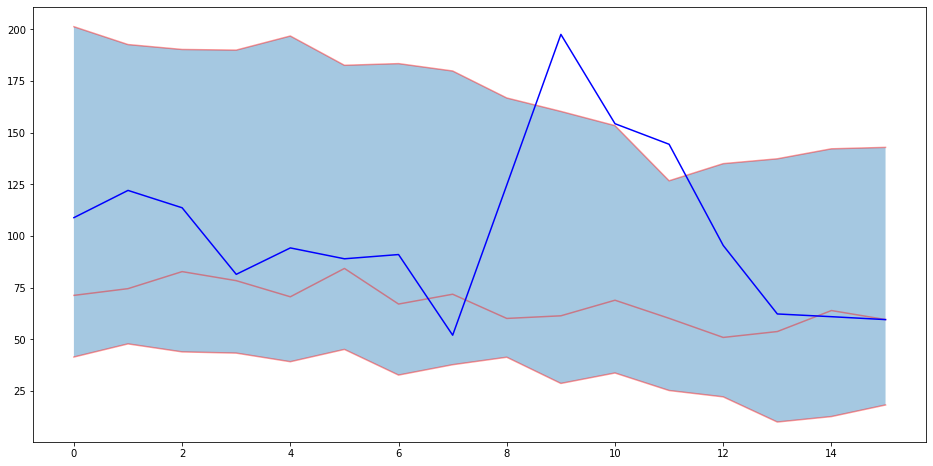

In [11]:
pred_10=model_test_predictions.iloc[:1,:].T
pred_50=model_test_predictions.iloc[1:2,:].T
pred_90=model_test_predictions.iloc[2:,:].T
pred_10=pred_10.reset_index(drop=True)
pred_50=pred_50.reset_index(drop=True)
pred_90=pred_90.reset_index(drop=True)
Y_test=Y_test.T
Y_test=Y_test.reset_index(drop=True)
# pred_90=np.array(pred_90)
pred_90=pred_90.values.ravel()
pred_10=pred_10.values.ravel()
pred_50=pred_50.values.ravel()
# Y_test=Y_test.values.ravel()

# pred_50.index = pred_50.index.values
# pred_10.index = pred_10.index.values
# pred_90.index = pred_90.index.values

plt.figure(figsize=(16, 8))
# plt.scatter(X, y, alpha=0.5, color='tab:blue')
# plt.scatter(X_out, y_out, alpha=0.5, color='tab:orange')
plt.plot(pred_50, color='red', alpha=0.4)
plt.plot(pred_10, color='red', alpha=0.4)
plt.plot(pred_90, color='red', alpha=0.4)

plt.plot(Y_test, color='blue')
plt.fill_between(np.arange(0,len(Y_test),1), pred_10, pred_90, alpha=0.4)

# plt.fill_between(model_test_predictions.iloc[2:,:].T, model_test_predictions.iloc[1:2,:].T, color='red', alpha=0.4)


# plt.plot(Y_test, color='tab:red', linestyle='--')

# plt.xlabel('X')
# plt.ylabel('y');

In [ ]:
X_train.shape

In [4]:
ii_shape=(X_train.shape[0], X_train.shape[1])
ii_shape

(20050, 326)

In [5]:
def create_model():    
    net_input=Input(shape=ii_shape, name='Input')
    
    Seq_network = Sequential([keras.layers.Flatten(input_shape=ii_shape),
                          keras.layers.Dense(128, 'relu'),
                          keras.layers.Dense(128, 'relu'),
                          keras.layers.Dense(128, 'relu'),
                          keras.layers.Dense(128, 'relu'),
                          keras.layers.Dense(128, 'relu')], name='First_Network')(net_input) 
    
    Prior_network = Sequential([keras.layers.Flatten(input_shape=ii_shape),
                          keras.layers.Dense(128, 'relu', 
                                             kernel_initializer='normal', 
                                             trainable=False),
                          keras.layers.Dense(128, 'relu', 
                                             kernel_initializer='normal', 
                                             trainable=False),
                          keras.layers.Dense(128, 'relu', 
                                             kernel_initializer='normal', 
                                             trainable=False),
                          keras.layers.Dense(128, 'relu', 
                                             kernel_initializer='normal', 
                                             trainable=False),
                          keras.layers.Dense(128, 'relu', 
                                             kernel_initializer='normal', 
                                             trainable=False)], name='Prior_network')(net_input) 
    
    
    
    output_10 = keras.Sequential([
        keras.layers.Dense(128, 'relu'), 
        keras.layers.Dense(16)], name='Output_1')(Seq_network)
    
    output_50 = keras.Sequential([
        keras.layers.Dense(128, 'relu'), 
        keras.layers.Dense(16)], name='Output_2')(Seq_network)
    
    output_90 = keras.Sequential([
        keras.layers.Dense(128, 'relu'), 
        keras.layers.Dense(16)], name='Output_3')(Seq_network) 

    prior_out_10 = Dense(16, 'relu', kernel_initializer='normal',
                        trainable=False, name='prior_out_1')(Prior_network)
    prior_out_50 = Dense(16, 'relu', kernel_initializer='normal', 
                        trainable=False, name='prior_out_2')(Prior_network)
    prior_out_90 = Dense(16, 'relu', kernel_initializer='normal', 
                        trainable=False, name='prior_out_3')(Prior_network)
    
    
    
    prior_out_10 = Lambda(lambda x: x * 3.0, name='prior_scale_1')(prior_out_10)
    prior_out_50 = Lambda(lambda x: x * 3.0, name='prior_scale_2')(prior_out_50)
    prior_out_90 = Lambda(lambda x: x * 3.0, name='prior_scale_3')(prior_out_90)
    
    add_out_10 = add([output_10, prior_out_10], name='add_out_10')
    add_out_50 = add([output_50, prior_out_50], name='add_out_50')
    add_out_90 = add([output_90, prior_out_90], name='add_out_90')
    
    model=Model(inputs=net_input, outputs=[add_out_10, add_out_50, add_out_90])    
    model.compile(loss=[loss_10th_p, loss_50th_p, loss_90th_p], optimizer='adam')
    
    return model

# es = EarlyStopping(monitor='mean_absolute_error', mode='min', verbose=0, patience=20)
model = KerasRegressor(build_fn=create_model, epochs=3, batch_size=16, verbose=2)
bag = BaggingRegressor(base_estimator=model, n_estimators=3, verbose=2)
# SVG(model_to_dot(create_model()).create(prog='dot', format='svg'))

/tmp/ipykernel_154073/133445333.py:65: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, epochs=3, batch_size=16, verbose=2)


In [ ]:
bag.fit(X_train, Y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 3 for this parallel run (total 3)...


2022-10-26 16:30:22.217157: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-26 16:30:22.262865: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-10-26 16:30:22.262875: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2022-10-26 16:30:22.263484: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

In [ ]:
quantile_output = np.array([np.array(e.predict(x_grid)).reshape(3, 1000) for e in bag.estimators_])

In [ ]:
# # def tilted_loss(q,y,f):
# #     e = (y-f)
# #     return K.mean(K.maximum(q*e, (q-1)*e), axis=-1)

# # # losses for 10th, 50th and 90th percentile
# # loss_10th_p = lambda y,f: tilted_loss(0.10,y,f)
# # loss_50th_p = lambda y,f: tilted_loss(0.50,y,f)
# # loss_90th_p = lambda y,f: tilted_loss(0.90,y,f)
# loss_10th_p = lambda y_true, y_pred: qloss(0.1, y_true, y_pred)
# loss_50th_p = lambda y_true, y_pred: qloss(0.5, y_true, y_pred)
# loss_90th_p = lambda y_true, y_pred: qloss(0.9, y_true, y_pred)

# def create_model():
    
#     net_input=Input(shape=i_shape)
    
#     input_0 = Sequential([keras.layers.Flatten(input_shape=i_shape),
#                           keras.layers.Dense(128, 'relu'),
#                           keras.layers.Dense(128, 'relu'),
#                           keras.layers.Dense(128, 'relu')])(net_input) 
    
    
#     output_1 = keras.Sequential([
#         keras.layers.Dense(128, 'relu'),
#         keras.layers.Dense(16)
#     ])(input_0)
    
#     output_2 = keras.Sequential([
#         keras.layers.Dense(128, 'relu'),
#         keras.layers.Dense(16)
#     ])(input_0)
    
#     output_3 = keras.Sequential([
#         keras.layers.Dense(128, 'relu'),
#         keras.layers.Dense(16)
#     ])(input_0)
    
#     model=Model(inputs=net_input, 
#             outputs=[output_1, output_2, output_3])
    
#     model.compile(loss=[loss_10th_p, loss_50th_p, loss_90th_p], optimizer='adam')
    
#     return model
# # es = EarlyStopping(monitor='mean_absolute_error', mode='min', verbose=0, patience=20)
# model = KerasRegressor(build_fn=create_model, epochs=500, batch_size=16, verbose=2)
# model.fit(X_train_Scaled, Y_train_Scaled, epochs=10, verbose=0)
# model_test_predictions = pd.DataFrame(Y_scaler.inverse_transform(model.predict(X_test_Scaled).reshape(3,Y_test.shape[0])))
# SVG(model_to_dot(create_model()).create(prog='dot', format='svg'))
# # mean_absolute_error(Y_test, model_test_predictions[0])